# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ Our histogram indicates that there is a wide range of charge amounts in our data, with the distribution being heavily right-skewed. This might be causing our mean (13,270.42) and standard deviation (12,105.48) to be inflated and therefore less representative of the data.

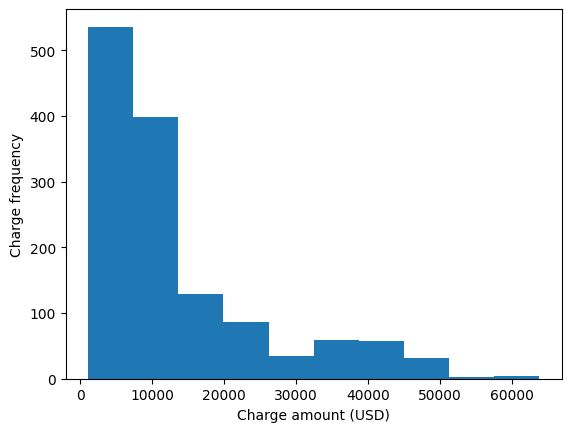

In [4]:
plt.hist(medical["charges"])
plt.xlabel("Charge amount (USD)")
plt.ylabel("Charge frequency")
plt.show()

In [5]:
medical_mean = np.mean(medical["charges"])
medical_std = np.std(medical["charges"])

print(f"Mean charge: {medical_mean:.2f}\nCharge STD: {medical_std:.2f}")

Mean charge: 13270.42
Charge STD: 12105.48


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Since our observations have been randomly sampled, we can use inferential statistics to address the administrator's concerns. The Central Limit Theorem suggests that, given a sufficiently large sample of data, our observations will be normally distributed around the mean. Therefore, we can apply a one-sample t-test to our observations.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ The administrator is concerned about whether the true mean charge has fallen ***below*** 12,000; therefore, a one-sided interval would be appropriate. Our critical value is 1.65, and the lower-bound for our 95% confidence interval is 12,725.69. Our lower-bound is higher than 12,000, meaning there is no need for our administrator to be concerned.

In [6]:
confidence_interval = .95
alpha = 1 - confidence_interval

# Calculate degrees of freedom
sample_n = len(medical)
df = sample_n - 1

# Calculate critical value
t_critical = t.ppf(1-alpha, df)
print(f"Our critical value for a one-sided 95% confidence interval is {t_critical:.2f}.")

Our critical value for a one-sided 95% confidence interval is 1.65.


In [7]:
# Calculate margin of error
margin_of_error = t_critical * (medical_std/np.sqrt(sample_n))

# Calculate 95% confidence interval
lower_bound = medical_mean - margin_of_error
print(f"The lower bound for our 95% confidence interval for the mean is {lower_bound:.2f}.")

The lower bound for our 95% confidence interval for the mean is 12725.69.


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

**Null Hypothesis:** People who are insured are charged the same amount as those who are not. (Mean charges are equal for insured and uninsured people.)

**Alternative Hypothesis:** People who are insured are charged a different amount than those who are not. (Mean charges are not equal for insured and uninsured people.)

We are assuming the variances of the two groups are equal.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

**Manual calculation results:**

t-statistic: 11.911090064054351

p-value: 0.0


**SciPy.stats results:**

SciPy t-statistic: 11.893299030876712

SciPy p-value: 4.461230231620717e-31

The results vary slightly, likely due to differences in how Python handles floating-point arithmetic in manual calculations vs. library functions.

In [11]:
# Manual hypothesis test

insured_group = medical['charges'][medical['insuranceclaim']==1]
uninsured_group = medical['charges'][medical['insuranceclaim']==0]

# Calculate sample sizes
n0 = len(insured_group)
n1 = len(uninsured_group)

# Calculate sample means
mean0 = np.mean(insured_group)
mean1 = np.mean(uninsured_group)

# Calculate sample standard deviations
std0 = np.std(insured_group, ddof=1)
std1 = np.std(uninsured_group, ddof=1)

In [26]:
# Calculate pooled standard deviation
s_p = np.sqrt(((n0-1)*(std0**2)+(n1-1)*(std1**2))/(n0+n1+2))
print(f"The pooled standard deviation is {s_p:.2f}.")

The pooled standard deviation is 11502.83.


In [24]:
# Calculate t-test statistic
t_stat = (mean0-mean1)/(s_p*(np.sqrt((1/n0)+(1/n1))))
print(f"The t-test statistic is {t_stat}.")

The t-test statistic is 11.911090064054351.


In [17]:
# Calculate the p-value
df = n0 + n1 - 2
p_value_manual = 2 * (1 - t.cdf(np.abs(t_stat), df))
print(f"The p-value is {p_value_manual}.")

The p-value is 0.0.


In [23]:
from scipy import stats
# t-test using scipy.stats
t_stat_scipy, p_value_scipy = stats.ttest_ind(insured_group, uninsured_group, equal_var = True)
print(f"SciPy t-statistic: {t_stat_scipy}\nSciPy p-value: {p_value_scipy}")

SciPy t-statistic: 11.893299030876712
SciPy p-value: 4.461230231620717e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ The scipy.stats library does not include a function for performing a z-test from a sample. This is likely due to the fact that z-tests are applicable only in cases of large sample sizes, while t-tests can be applied to both large and small sample sizes. In other words, a z-test is like a special-case version of a t-test.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test